## Multi Linear Regression_ToyotaCorolla
Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

   - - -   Model-model of the car
   - - -    Price-Offer Price in EUROs	
   - - -    Age_08_04-Age in months as in August 2004	
   - - -    Mfg_Month-Manufacturing month (1-12)	
   - - -    Mfg_Year	-Manufacturing Year
   - - -    KM-Accumulated Kilometers on odometer
   - - -    Fuel_Type	-Fuel Type (Petrol, Diesel, CNG)
   - - -    HP-Horse Power
   - - -    Met_Color	-Metallic Color?  (Yes=1, No=0)
   - - -    Color-Color (Blue, Red, Grey, Silver, Black, etc.)
   - - -    Automatic	-Automatic ( (Yes=1, No=0)
   - - -    cc-Cylinder Volume in cubic centimeters
   - - -    Doors-Number of doors
   - - -    Cylinders	-Number of cylinders
   - - -    Gears-Number of gear positions
   - - -    Quarterly_Tax-Quarterly road tax in EUROs
   - - -    Weight-Weight in Kilograms
   - - -    Mfr_Guarantee-Within Manufacturer's Guarantee period  (Yes=1, No=0)
   - - -    BOVAG_Guarantee-BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
   - - -    Guarantee_Period-	Guarantee period in months
   - - -    ABS-Anti-Lock Brake System (Yes=1, No=0)
   - - -    Airbag_1-Driver_Airbag  (Yes=1, No=0)
   - - -    Airbag_2-Passenger Airbag  (Yes=1, No=0)
   - - -    Airco-Airconditioning  (Yes=1, No=0)
   - - -    Automatic_airco-Automatic Airconditioning  (Yes=1, No=0)
   - - -    Boardcomputer-Boardcomputer  (Yes=1, No=0)
   - - -    CD_Player-CD Player  (Yes=1, No=0)
   - - -    Central_Lock-Central Lock  (Yes=1, No=0)
   - - -    Powered_Windows-Powered Windows  (Yes=1, No=0)
   - - -    Power_Steering-Power Steering  (Yes=1, No=0)
   - - -    Radio-Radio  (Yes=1, No=0)
   - - -    Mistlamps	-Mistlamps  (Yes=1, No=0)
   - - -    Sport_Model-Sport Model  (Yes=1, No=0)
   - - -    Backseat_Divider-Backseat Divider  (Yes=1, No=0)
   - - -    Metallic_Rim-Metallic Rim  (Yes=1, No=0)
   - - -    Radio_cassette-Radio Cassette  (Yes=1, No=0)
   - - -    Tow_Bar-Tow Bar  (Yes=1, No=0)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [9]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [11]:
data2=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# EDA

In [12]:
data2.columns=['price','age','km','hp','cc','door','gear','tax','weight']
data2

,price,age,km,hp,cc,door,gear,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
data2[data2.duplicated()]

,price,age,km,hp,cc,door,gear,tax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [16]:
data3=data2.drop_duplicates().reset_index(drop=True)
data3

,price,age,km,hp,cc,door,gear,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [17]:
data3.isna().sum()

price     0
age       0
km        0
hp        0
cc        0
door      0
gear      0
tax       0
weight    0
dtype: int64

In [20]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1435 non-null   int64
 1   age     1435 non-null   int64
 2   km      1435 non-null   int64
 3   hp      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   door    1435 non-null   int64
 6   gear    1435 non-null   int64
 7   tax     1435 non-null   int64
 8   weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [21]:
data3.describe()

,price,age,km,hp,cc,door,gear,tax,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# CORRELATION ANALYSIS

In [22]:
data3.corr()

,price,age,km,hp,cc,door,gear,tax,weight
price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
door,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gear,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


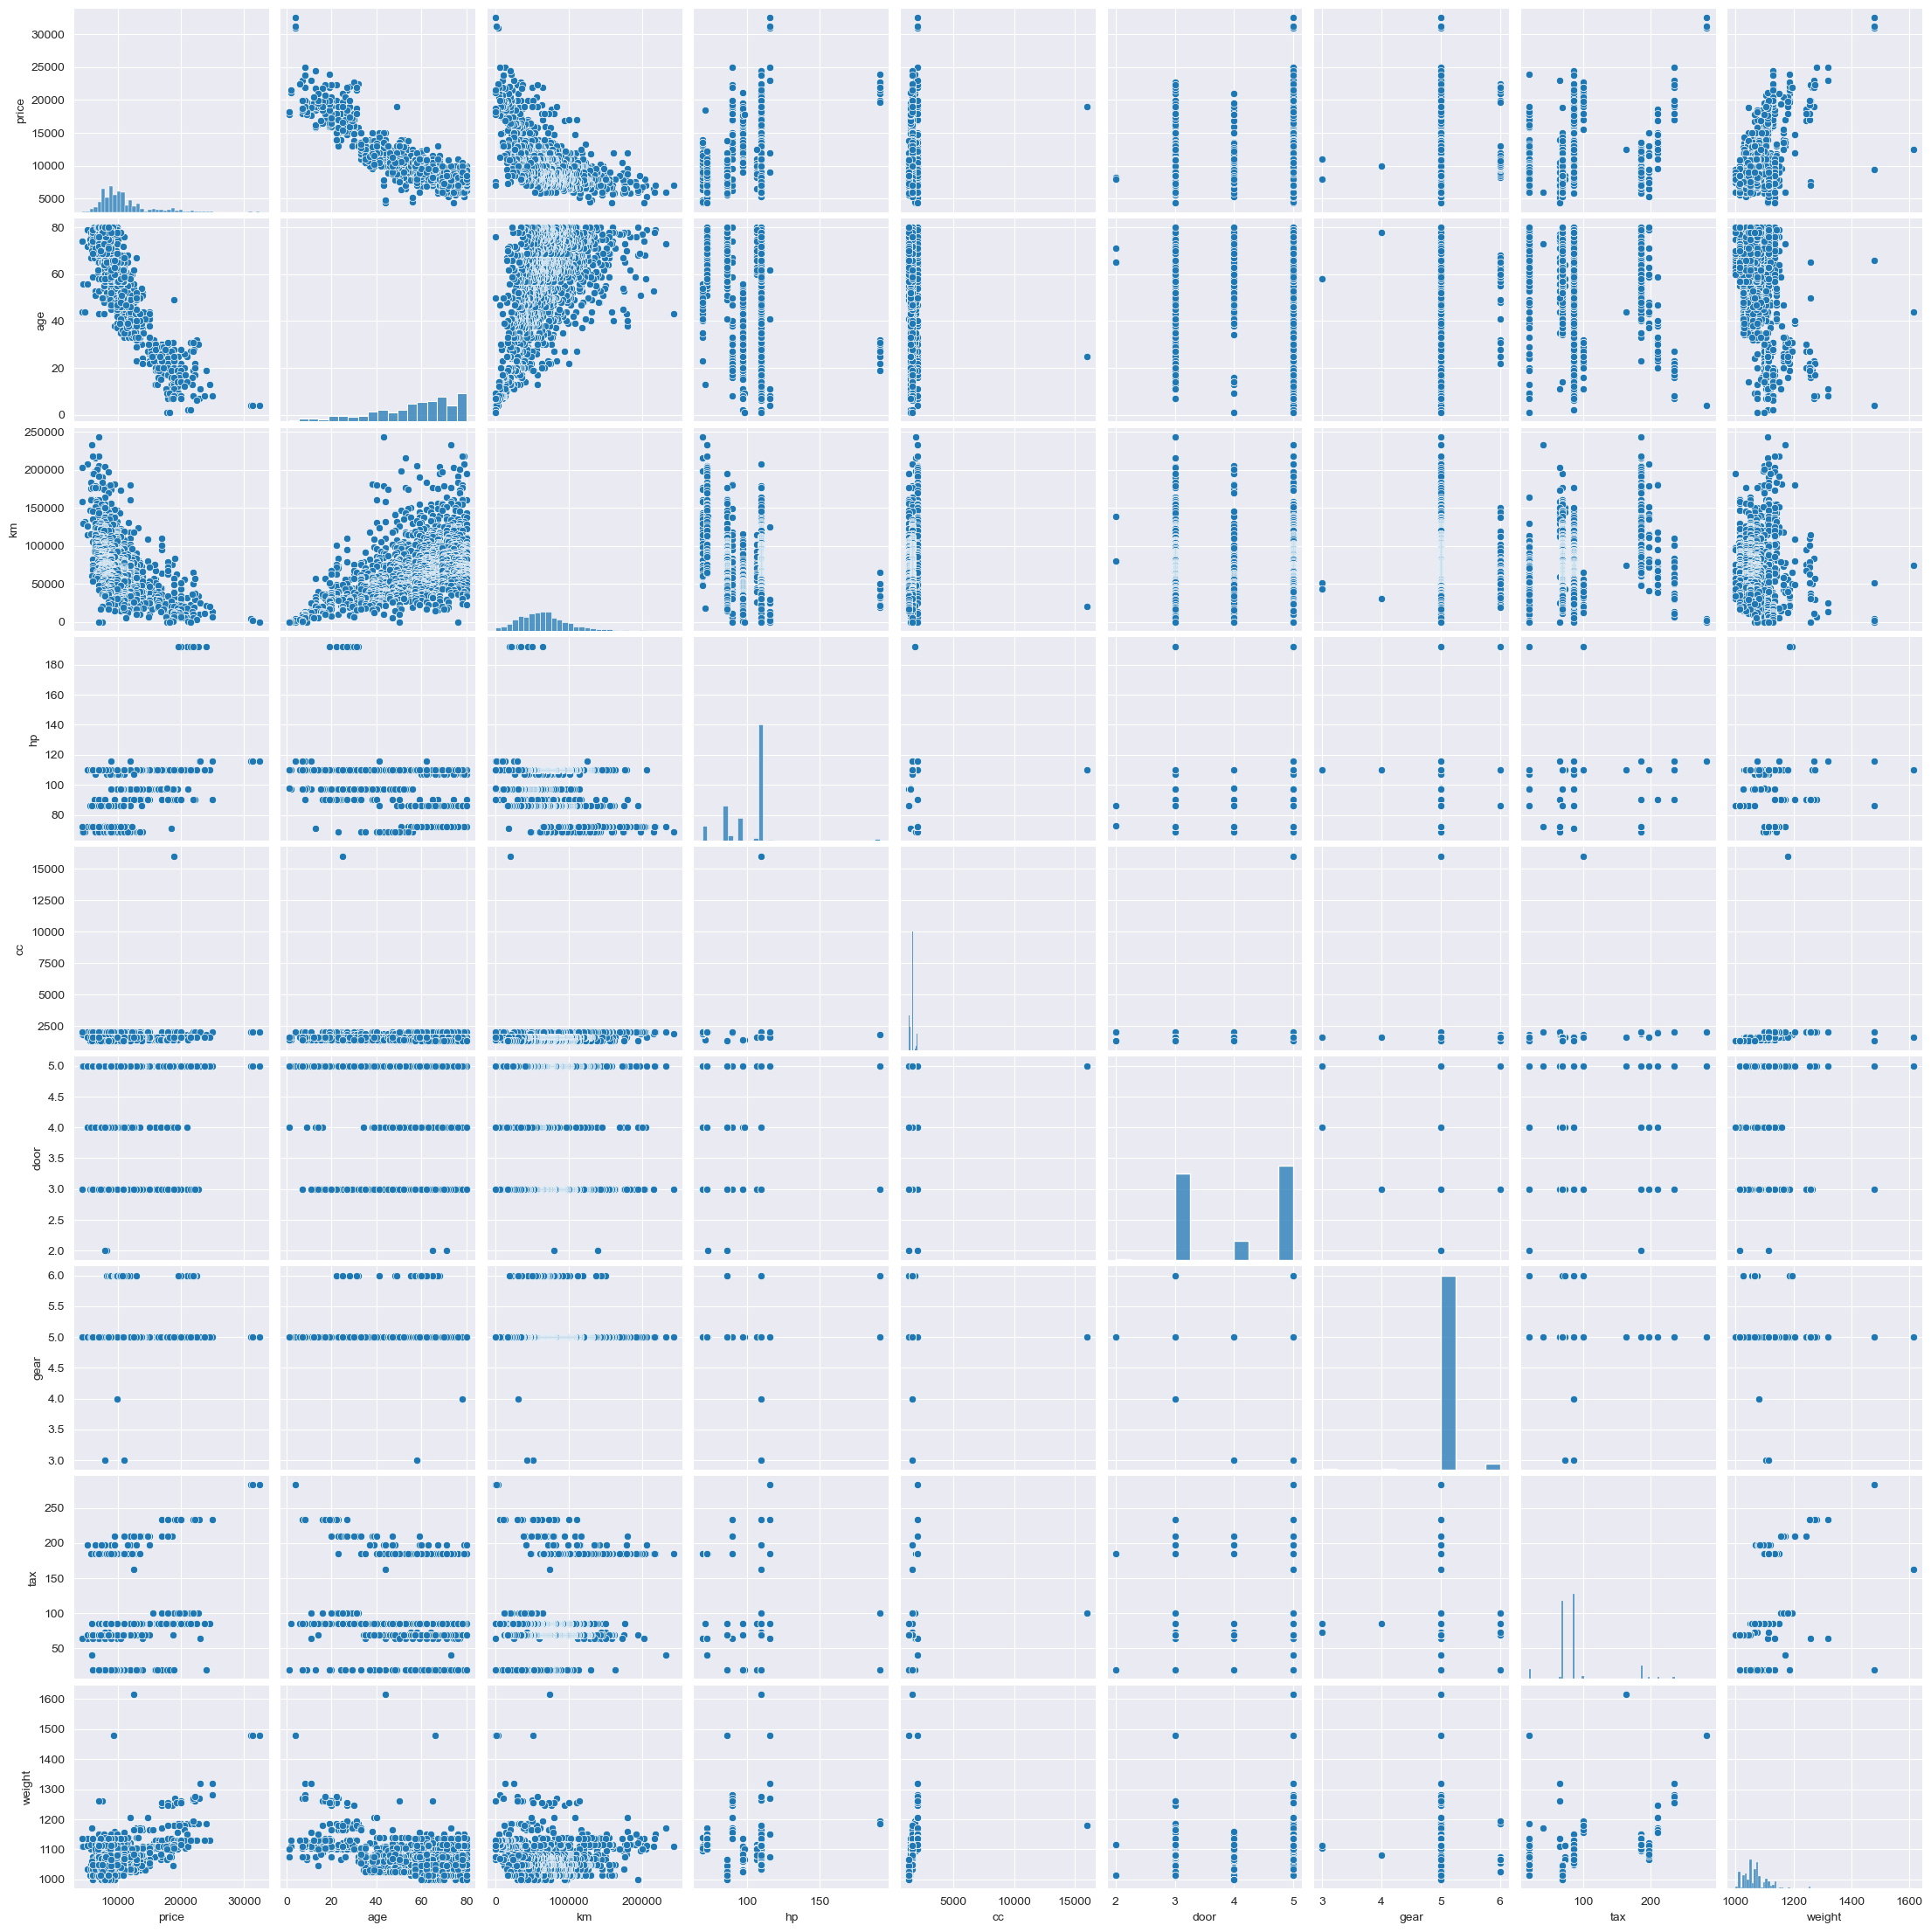

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

# MODELBUILDING

In [26]:
model=smf.ols('price~age+km+hp+cc+door+gear+tax+weight',data=data3).fit()
model.rsquared,model,model.rsquared_adj,model.aic

(0.8625200256947,
 0.8617487495415146,
 24750.407207346932)

 - MODEL TESTING

In [28]:
#cofficient of parameters
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
door           -0.920189
gear          597.715894
tax             3.858805
weight         16.855470
dtype: float64

In [29]:
model.pvalues

Intercept     1.113392e-04
age          1.879217e-288
km            1.994713e-56
hp            5.211155e-28
cc            1.882393e-01
door          9.816443e-01
gear          2.452430e-03
tax           3.290363e-03
weight        1.031118e-51
dtype: float64

In [31]:
#model accuracy is 86.252% and insignificant varibales are cc and door
#building slr and mlr and finding their pvalues

slr_c=smf.ols('price~cc',data=data3).fit()
slr_c.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [32]:
slr_d=smf.ols('price~door',data=data3).fit()
slr_d.pvalues

Intercept    8.976407e-75
door         2.404166e-12
dtype: float64

In [34]:
slr_cd=smf.ols('price~cc+door',data=data3).fit()
slr_cd.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
door         2.109558e-11
dtype: float64

In [35]:
#both cc and door is significant values. pvalue<0.05

#since all variables are significant there is no multi collinearity issue

# MODEL VALIDATION

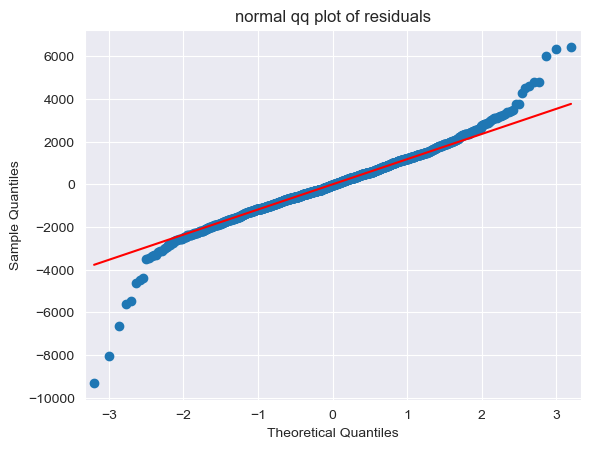

In [39]:
#since all variables are significant there is no multi collinearity issue

#NEXT RESIDUAL ANALYSIS
#test for normality of rresiduals, qq plot using residual model

sm.qqplot(model.resid,line='q')      # q, a line is fitted for the quantiles , line=45 (to dram 45*line )
plt.title("normal qq plot of residuals")
plt.show()

In [41]:
# Outlier detection from above QQ plot of residuals
list(np.where(model.resid>5000))

[array([109, 146, 522], dtype=int64)]

In [42]:
list(np.where(model.resid<-5000))

[array([190, 191, 220, 600, 959], dtype=int64)]

In [43]:
# Test for HOMOSCEDASTICITY. Models std fitted value vs std residual value

def std_values(val):
    return (val-val.mean())/val.std()

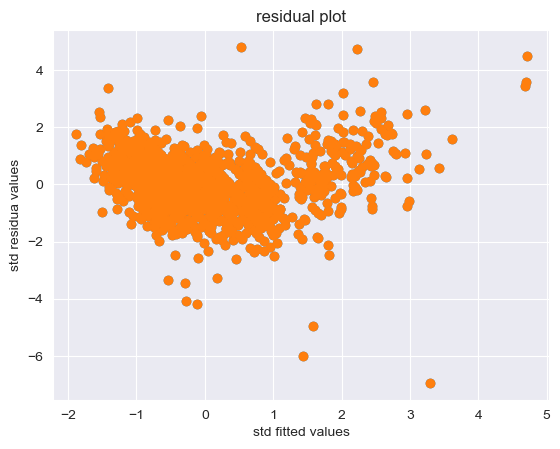

In [45]:
plt.scatter(std_values(model.fittedvalues),std_values(model.resid))
plt.title("residual plot")
plt.xlabel("std fitted values")
plt.ylabel("std residua values")
plt.show()

 - - HOMOSCEDASTICITY

 - REGRESSION PLOTS

eval_env: 1


<Figure size 2000x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

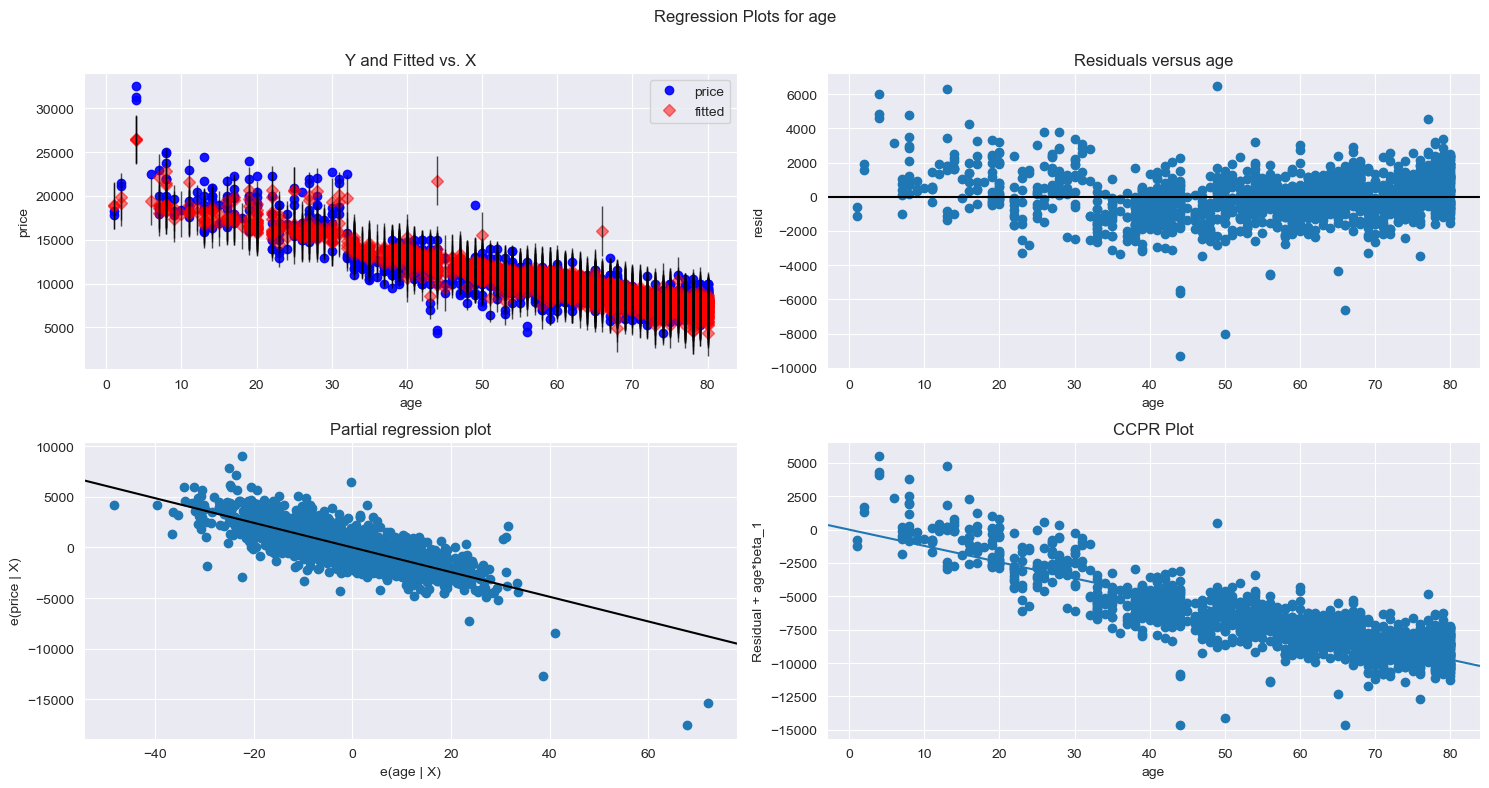

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"age",fig=fig)
plt.show()

eval_env: 1


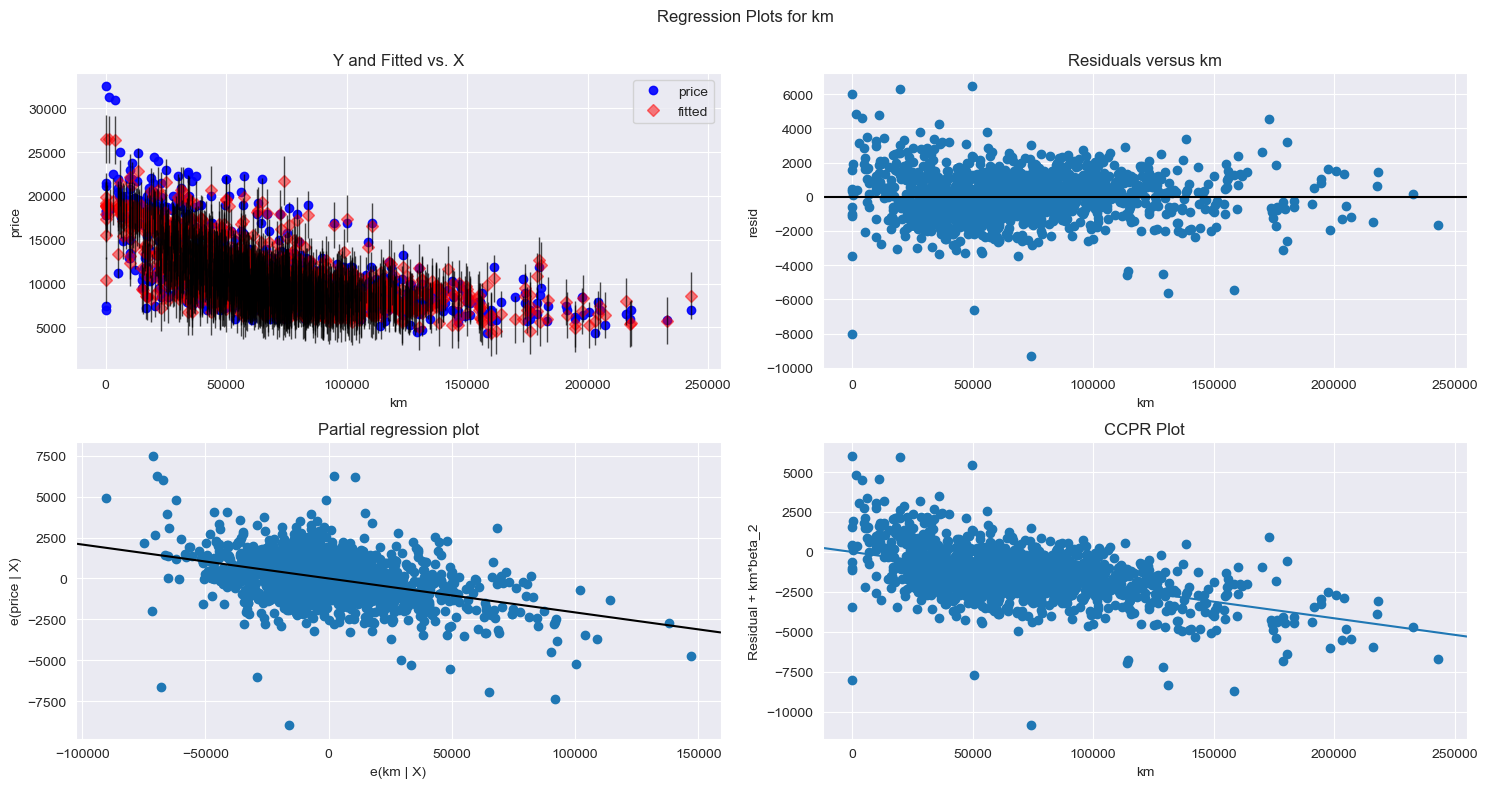

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"km",fig=fig)
plt.show()

eval_env: 1


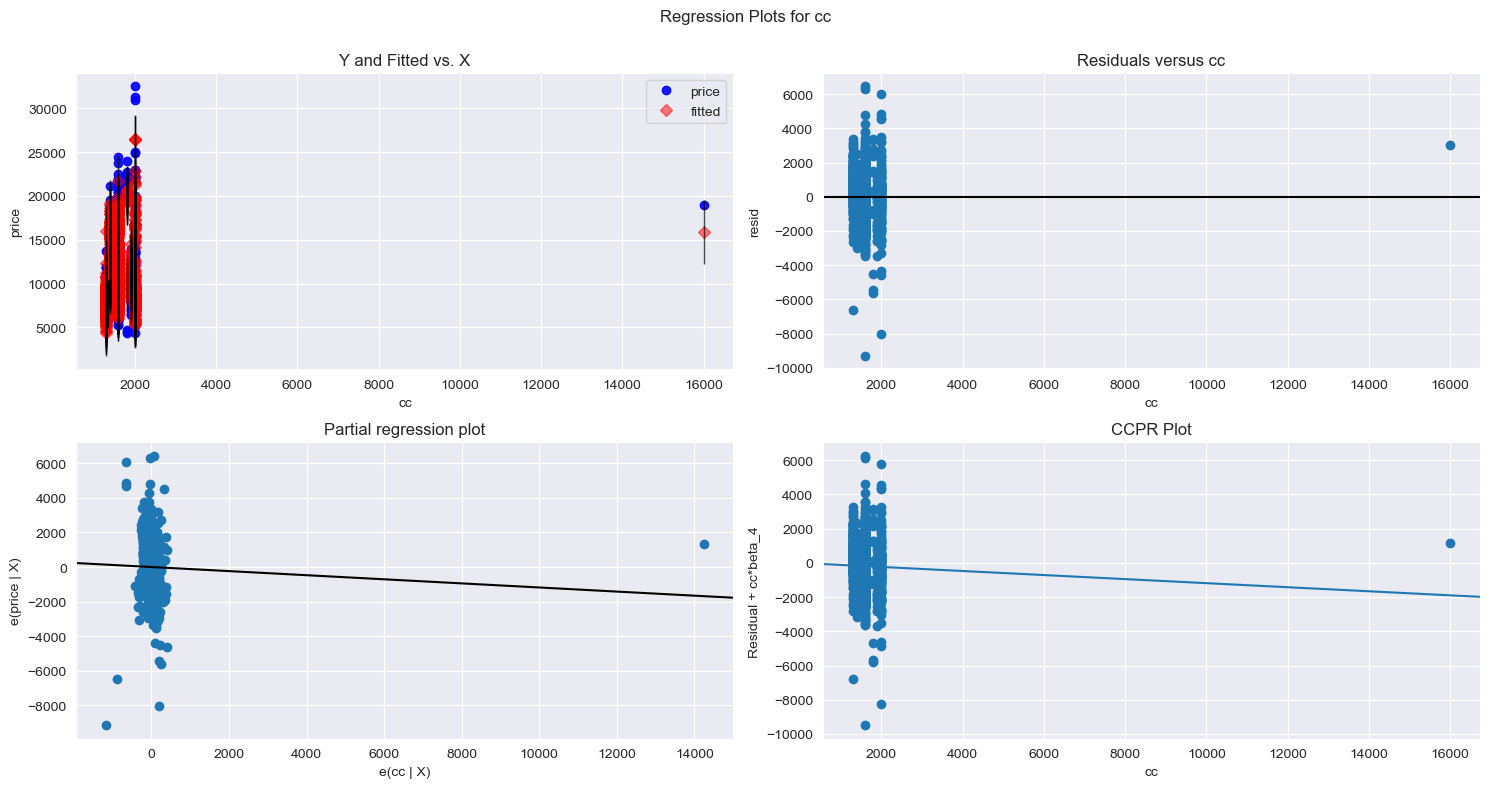

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

eval_env: 1


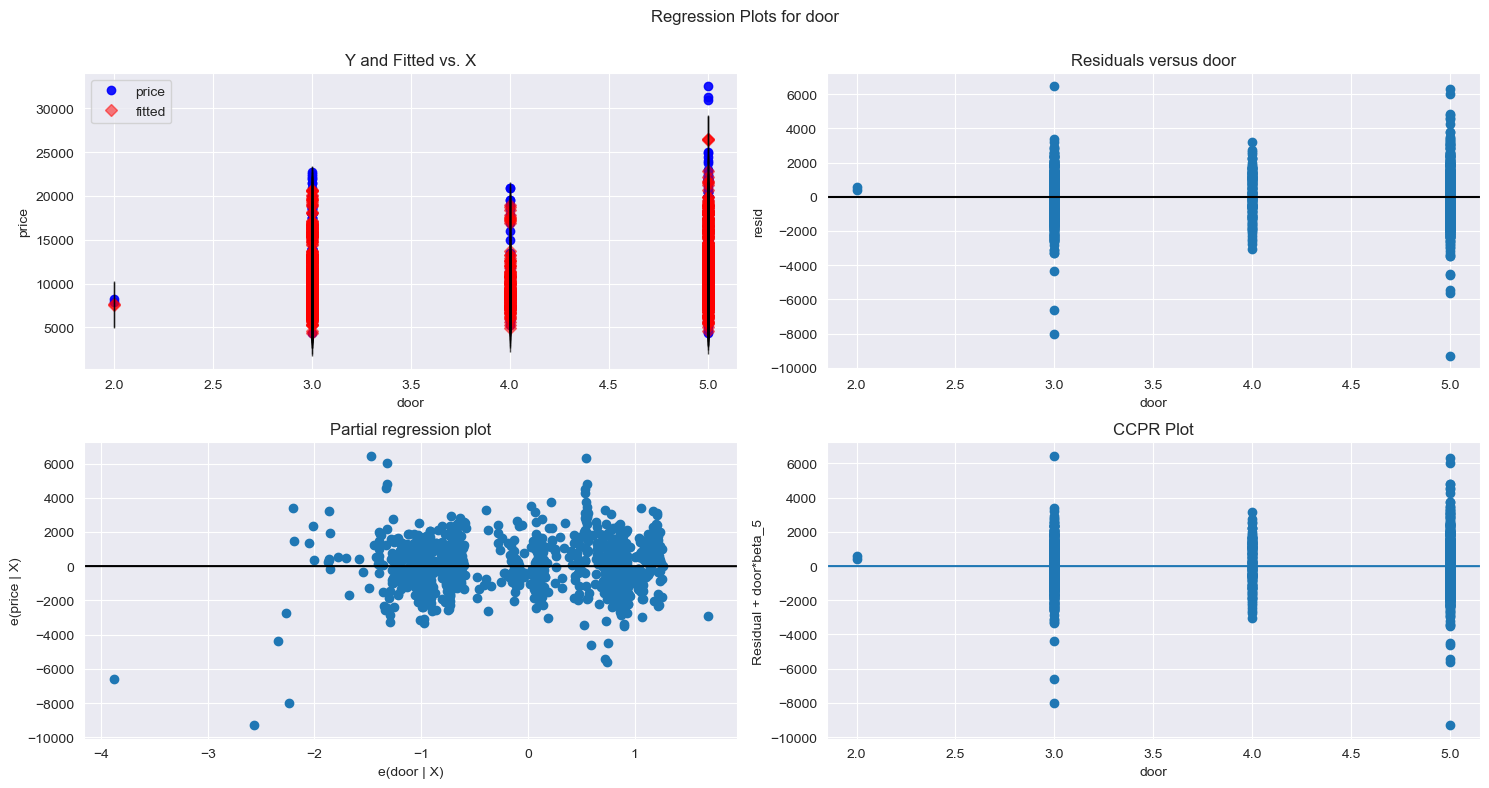

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"door",fig=fig)
plt.show()

eval_env: 1


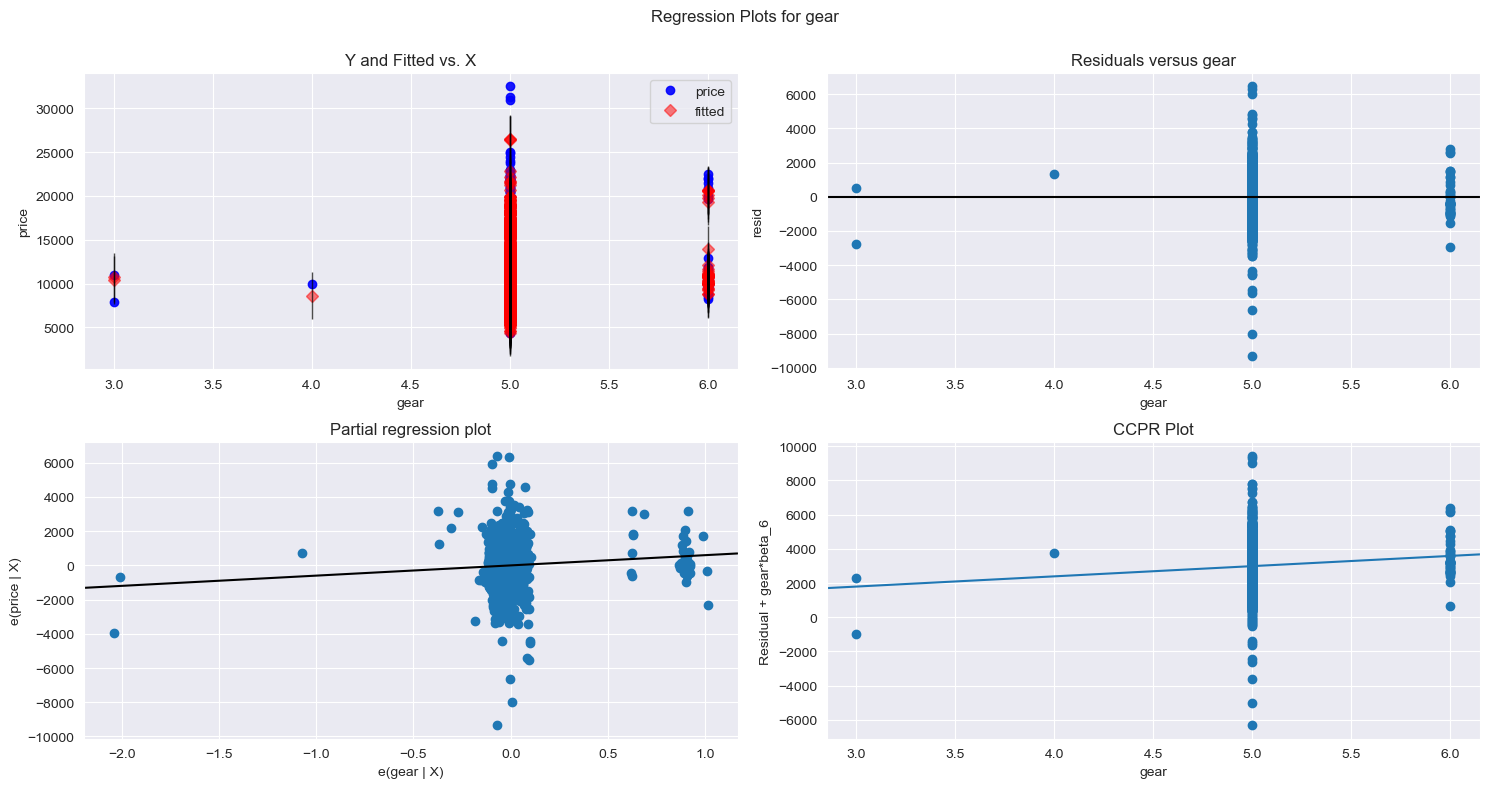

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"gear",fig=fig)
plt.show()

eval_env: 1


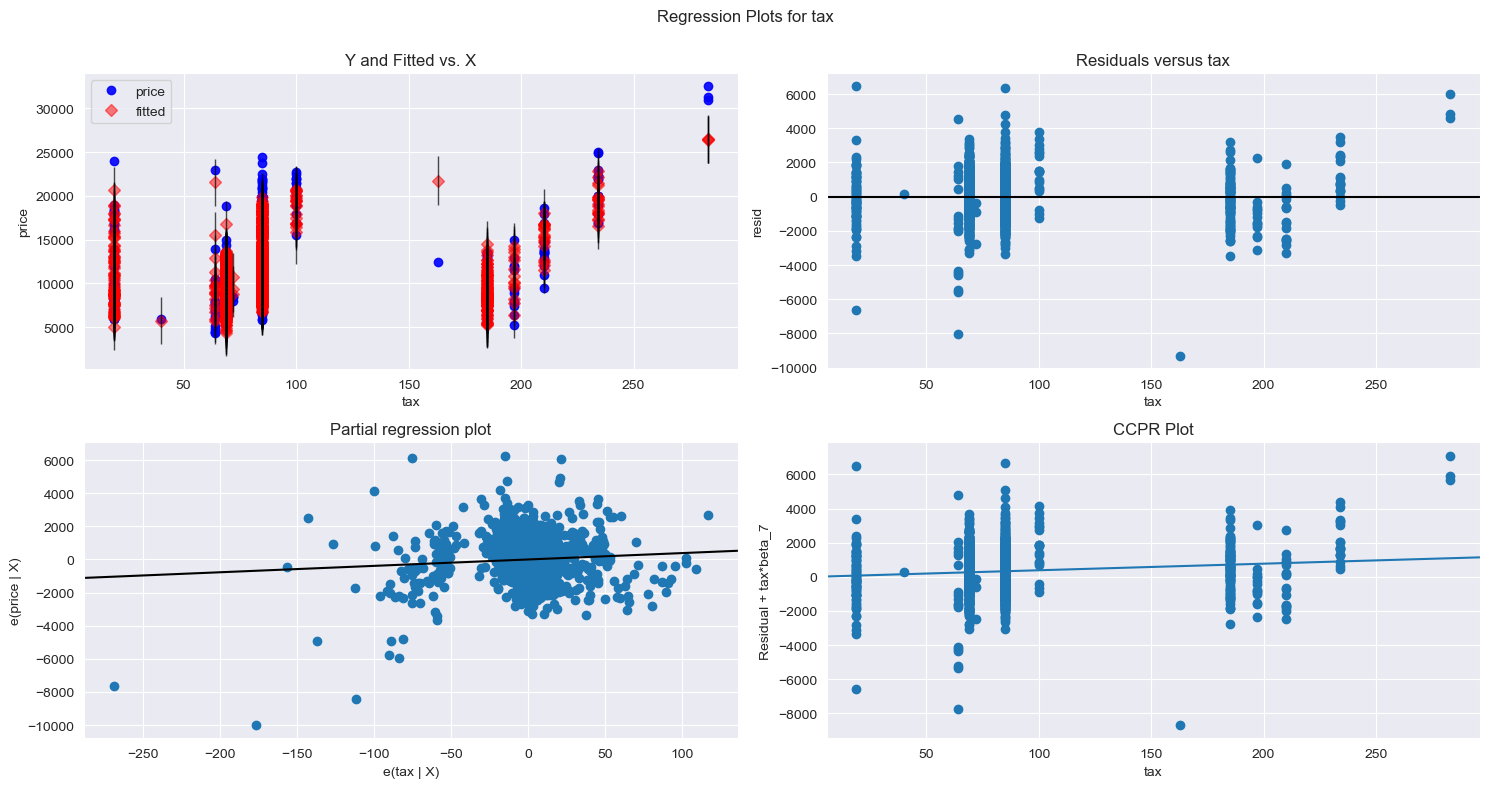

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"tax",fig=fig)
plt.show()

eval_env: 1


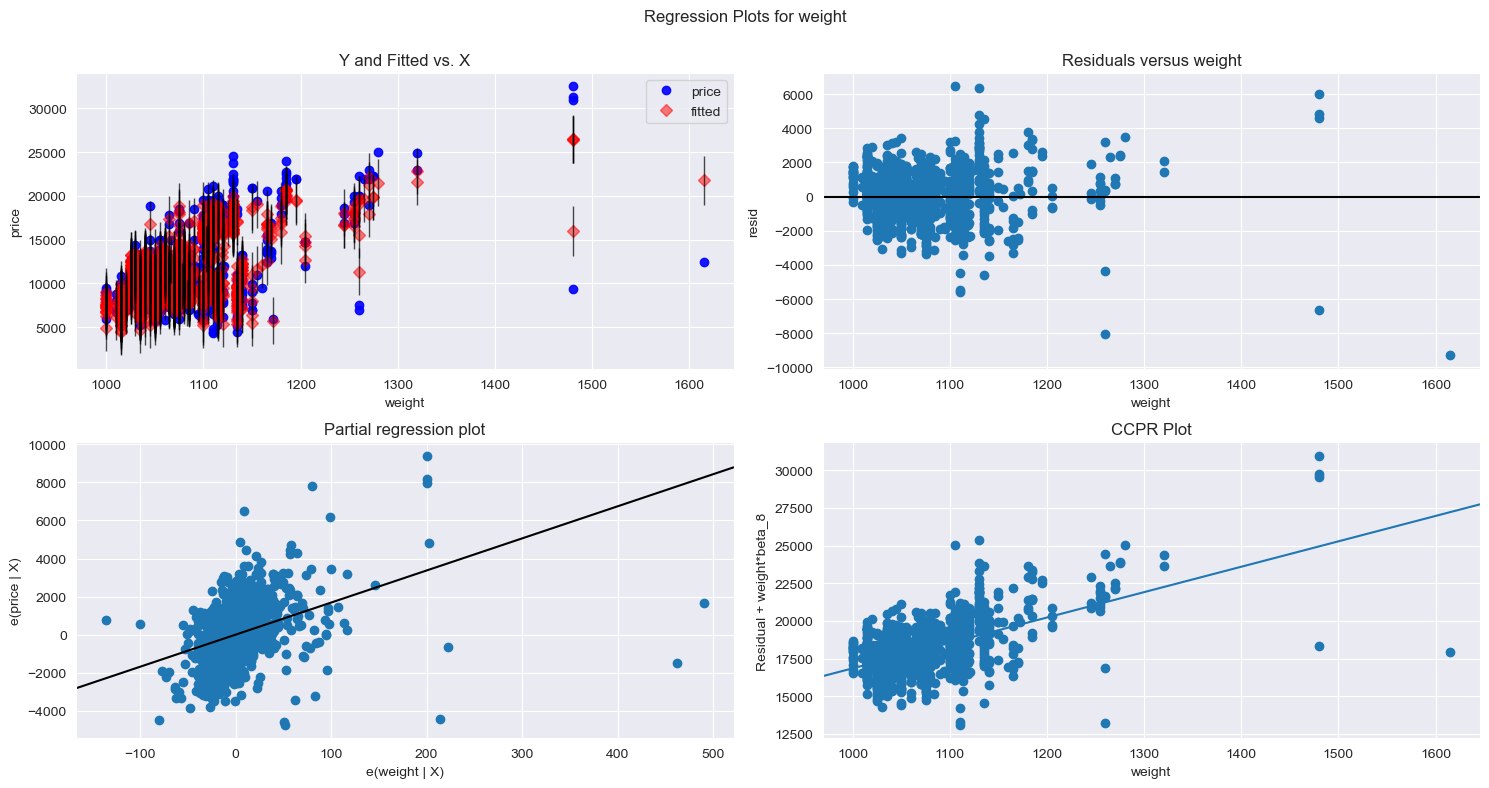

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"weight",fig=fig)
plt.show()

## model deletion diagnostics

In [58]:
# cooks distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

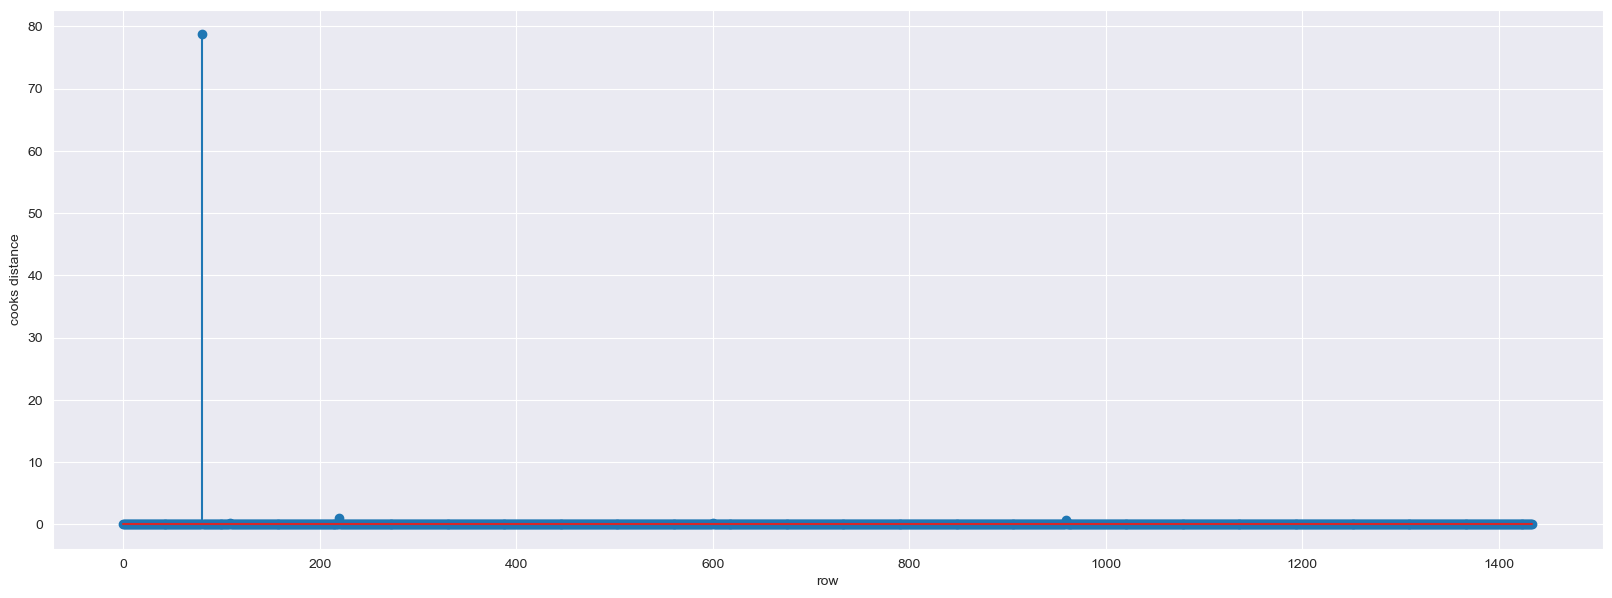

In [72]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel("row")
plt.ylabel("cooks distance")
plt.show()

In [64]:
np.argmax(c),np.max(c)

(80, 78.72950582247482)

In [74]:
# leverage value
k=data3.shape[1]
n=data3.shape[0]
lev=3*(k+1)/n
lev

0.020905923344947737

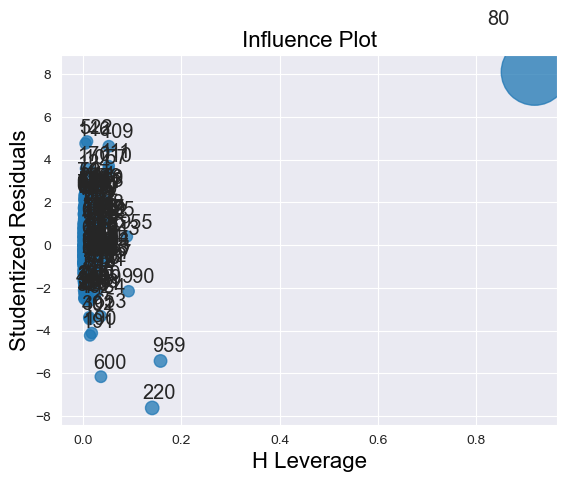

In [75]:
influence_plot(model)
plt.show()

## improving the model

In [86]:
data_n=data3.copy()
data_n

,price,age,km,hp,cc,door,gear,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [93]:
#discarding influeincing observations
data4=data_n.drop(data_n.index[[80,959,220,109,146,522,190,191,600]],axis=0).reset_index(drop=True)
data4

,price,age,km,hp,cc,door,gear,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1421,7500,69,20544,86,1300,3,5,69,1025
1422,10845,72,19000,86,1300,3,5,69,1015
1423,8500,71,17016,86,1300,3,5,69,1015
1424,7250,70,16916,86,1300,3,5,69,1015


In [94]:
# build model and find rsquared

f1_model=smf.ols('price~age+km+hp+cc+door+gear+tax+weight',data=data4).fit()
f1_model.rsquared,f1_model.rsquared_adj,f1_model.aic

(0.8908469974448258, 0.8902307490182616, 24205.45595502503)

## model prediction

In [95]:
#new data
n_data=pd.DataFrame({'age':12,'km':40000,'hp':80,'cc':1300,'door':4,'gear':5,'tax':69,'weight':1015},index=[0])
n_data

,age,km,hp,cc,door,gear,tax,weight
0,12,40000,80,1300,4,5,69,1015


In [99]:
f1_model.predict(n_data)

0    14510.123524
dtype: float64

In [100]:
#prediction for data set
pred_y=f1_model.predict(data4)
pred_y

0       16301.019522
1       15858.357172
2       16279.465547
3       15949.124300
4       15821.451139
            ...     
1421     9116.182491
1422     8495.098355
1423     8640.473609
1424     8753.712302
1425    10807.084257
Length: 1426, dtype: float64